In [0]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
import math
from sklearn.tree import DecisionTreeClassifier

In [0]:
#--------------------Run this cell to mount your Google Drive-------------------
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#--------------------Reading Data from Google Drive------------------------

# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#Reading the file from Googlr Drive

data = pd.read_csv("/content/drive/My Drive/ER/Decision Trees/Fraud_check.csv", sep = ',')
#data_x = data.drop(labels = ["y"], axis = 1)
#data_y = data["y"]

In [0]:
sns.set_style("whitegrid")

In [0]:
data.head(20)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


In [0]:
#Adding a target column "Fraud" which classifies data into Risky or Good. 
data["Fraud"] = list(map(lambda x: "Risky" if x>= 30000  else "Good",  data["Taxable.Income"]))

In [0]:
data.head(20)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Fraud
0,NO,Single,68833,50047,10,YES,Risky
1,YES,Divorced,33700,134075,18,YES,Risky
2,NO,Married,36925,160205,30,YES,Risky
3,YES,Single,50190,193264,15,YES,Risky
4,NO,Married,81002,27533,28,NO,Risky
5,NO,Divorced,33329,116382,0,NO,Risky
6,NO,Divorced,83357,80890,8,YES,Risky
7,YES,Single,62774,131253,3,YES,Risky
8,NO,Single,83519,102481,12,YES,Risky
9,YES,Divorced,98152,155482,4,YES,Risky


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
Undergrad          600 non-null object
Marital.Status     600 non-null object
Taxable.Income     600 non-null int64
City.Population    600 non-null int64
Work.Experience    600 non-null int64
Urban              600 non-null object
Fraud              600 non-null object
dtypes: int64(3), object(4)
memory usage: 32.9+ KB


In [0]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


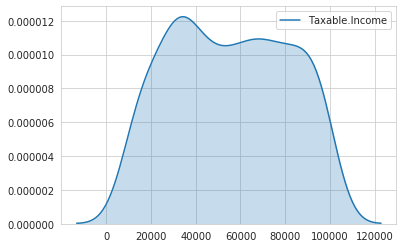

In [0]:
#Exploratory Data Analysis
#Univariate Analysis


#Distribution of Taxable.Income
sns.kdeplot(data = data["Taxable.Income"], shade = True)

In [0]:
#Taking log of the Taxable.Income to make it normal.
data["Tax.Income_log"] = list(map(lambda x: math.log(x) , data["Taxable.Income"]))

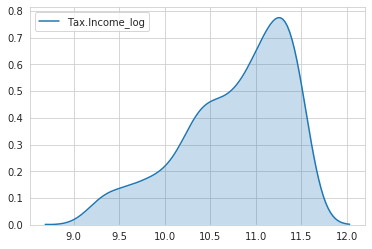

In [0]:
sns.kdeplot(data = data["Tax.Income_log"], shade = True)

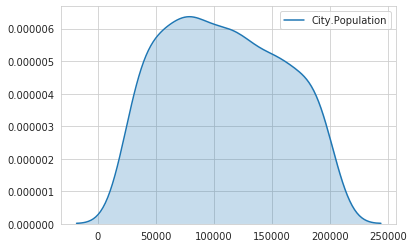

In [0]:
#Checking distribution of City.Population.

sns.kdeplot(data = data["City.Population"], shade = True)

In [0]:
data["City.Population_log"] = list(map(lambda x: math.log(x) , data["City.Population"]))

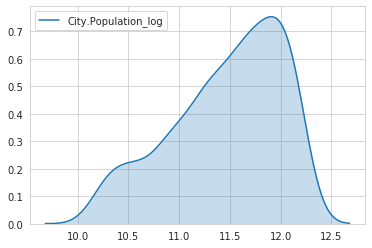

In [0]:
#Taking log of City Population.
sns.kdeplot(data = data["City.Population_log"], shade = True)

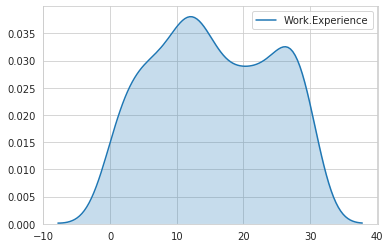

In [0]:
#Checking Work ex distribution

sns.kdeplot(data = data["Work.Experience"], shade = True)

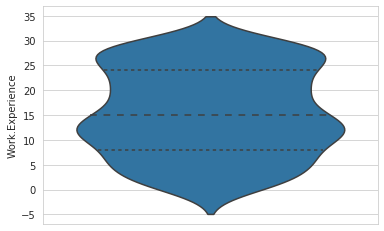

In [0]:
sns.violinplot(data = data, x= "Work.Experience", orient = "v", inner= "quartile" )

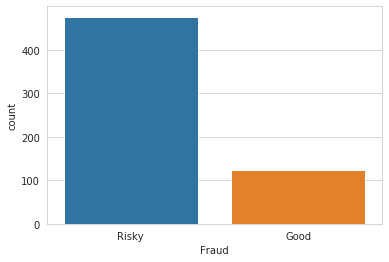

In [0]:
#Exploratory Data Analysis
#Bivariate Analysis


#Plotting: Count of Taxable Income

sns.set_style("whitegrid")
sns.countplot(data = data, x = "Fraud")

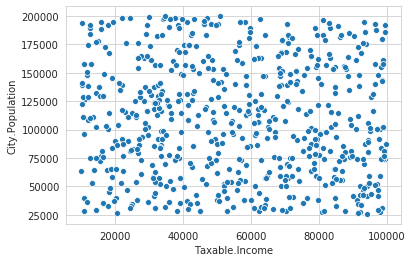

In [0]:
sns.scatterplot(x = data["Taxable.Income"], y = data["City.Population"])

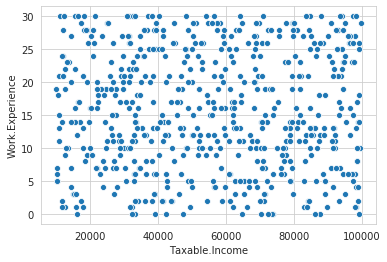

In [0]:
sns.scatterplot(x = data["Taxable.Income"], y = data["Work.Experience"])

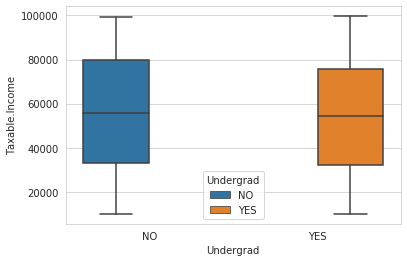

In [0]:
#Distribution of those candidates who do not have undergraduate degree

sns.boxplot(x = "Undergrad", y = "Taxable.Income", hue = "Undergrad", data = data )

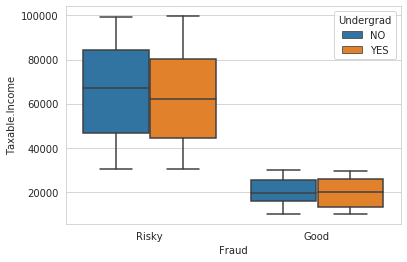

In [0]:
sns.boxplot(x = "Fraud", y = "Taxable.Income", hue = "Undergrad", data = data )

In [0]:
#Data Preparation

#Converting Fraud to 0s and 1s  and seperating Y label.

data["Fraud"].replace(to_replace = "Risky", value = 1, inplace = True)
data["Fraud"].replace(to_replace = "Good", value = 0, inplace = True)

y = data["Fraud"]

In [0]:
data.drop(  labels = "Fraud", axis = 1, inplace = True)

In [0]:
# data_transformed will contain variables which gave been feature engineered.
data_transformed = data

In [0]:
#Removing the transformed features from data
data.drop(  labels = ["Tax.Income_log", "City.Population_log"], axis = 1, inplace = True)

In [0]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [0]:
data["Undergrad"].unique()

array(['NO', 'YES'], dtype=object)

In [0]:
data["Marital.Status"].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [0]:
data["Urban"].unique()

array(['YES', 'NO'], dtype=object)

In [0]:
#Converting variables with discrete values into dummy variables.

Undergrad_dummy = pd.get_dummies(data["Undergrad"])
Marital_dummy = pd.get_dummies(data["Marital.Status"])
Urban_dummy = pd.get_dummies(data["Urban"])

In [0]:
data.drop( labels = ["Undergrad","Marital.Status","Urban"], axis = 1, inplace = True)

In [0]:
#Concatinating the columns with dataset

data_final = pd.concat([data,Undergrad_dummy, Marital_dummy, Urban_dummy], axis = 1)

In [0]:
data_final.head()

,Taxable.Income,City.Population,Work.Experience,NO,YES,Divorced,Married,Single,NO,YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0


In [0]:
#Train Test Split

X_train, X_test, y_train, y_test = train_test_split(data_final, y, test_size = 0.2, stratify = y, random_state = 42)

In [0]:
#Model bulding - Decision Trees

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)    #Fitting the train data

dt_predict = dt.predict(X_test) #Predicting on test data

In [0]:
dt_predict

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1])

In [0]:
#Calling confusion matrix
cm = confusion_matrix(y_test, dt_predict)

In [0]:
cm_ravel = cm.ravel() #tn, fp, fn, tp

In [0]:
cm_ravel

array([25,  0,  1, 94])

In [0]:
#Accuracy
#(tp+tn)/(tp+tn+fp+fn)

a = (cm_ravel[3] + cm_ravel[0])/(len(y_test))
print("Accuracy is: ",round(a*100,2))

#Precision
#tp/(tp+fp)

p = cm_ravel[3]/(cm_ravel[3] + cm_ravel[1])
print("\nPrecision is: ", round(p*100,2))

#Recall
#tp/(tp+fn)

r = cm_ravel[3]/ (cm_ravel[3] + cm_ravel[2])
print("\nRecall is: ", round(r*100,2))

#F1 score
#(2*Recall*Precision)/(Recall+ Precision)

f1 = (2*r*p)/(r+p)
print("\nF1 Score is: ",round(f1*100,2))

Accuracy is:  99.17

Precision is:  100.0

Recall is:  98.95

F1 Score is:  99.47
